1st little Eda practice


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes


In [3]:
df=pd.DataFrame(load_diabetes().data,columns=load_diabetes().feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
load_diabetes().target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [7]:
target = load_diabetes().target

In [8]:
df.shape

(442, 10)

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [10]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

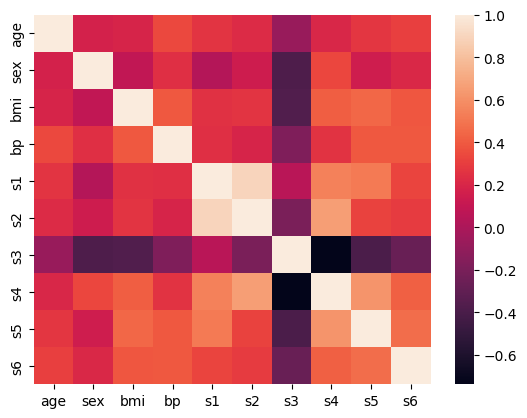

In [11]:
sns.heatmap(df.corr())

In [12]:
x=df
y=target

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
lr=LinearRegression()
lr.fit(x_train,y_train)
l_pred=lr.predict(x_test)

In [14]:
print(mean_squared_error(y_test,l_pred))
print(r2_score(y_test,l_pred))
print(lr.score(x_test,y_test))


3213.2301677563987
0.4209843229247693
0.4209843229247693


SVM - SVR

Problem Statement- In this data , we have one independent variable "hours of study" and one dependent variable "Marks" . You have to traun a SVR model to understand the relationship between the hours of study and marks of the student to predict the student's marks based on their number of dedicated to studied

In [15]:
df=pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

In [16]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [17]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [19]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [20]:
df.isnull().sum()

,0
Hours of Study,0
Marks,0


In [21]:
df.rename(columns={'Hours of Study':'Hours'},inplace=True)
#df.columns.values[0]= "Hours"

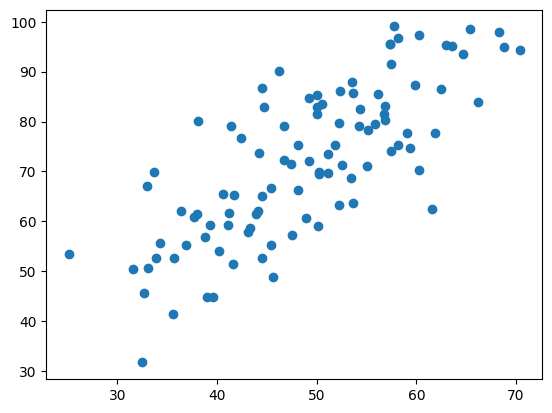

In [22]:
plt.scatter(df['Hours'],df['Marks'])
plt.show()

<Axes: >

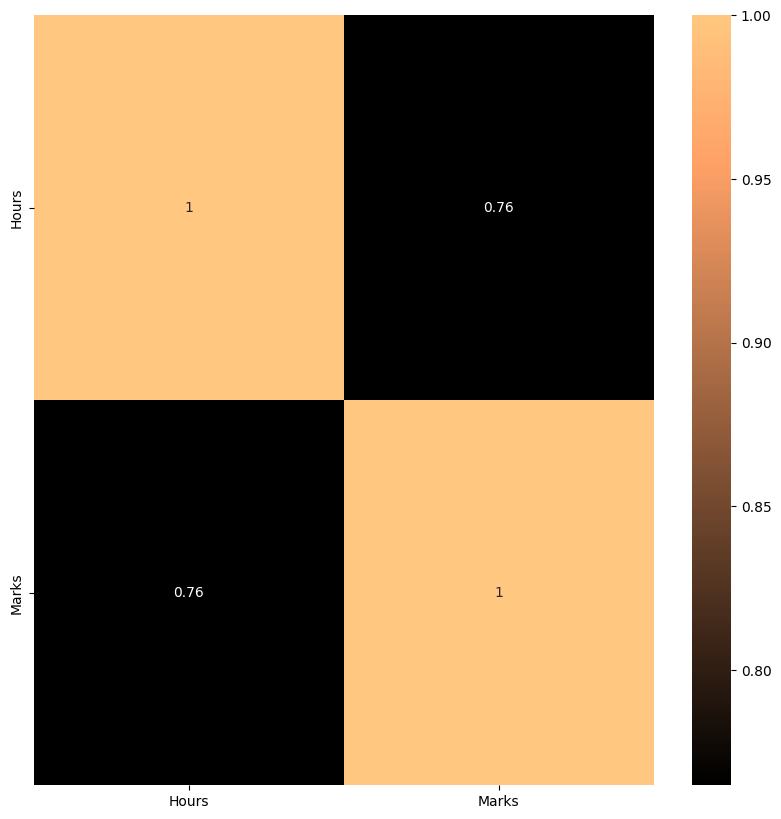

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='copper')

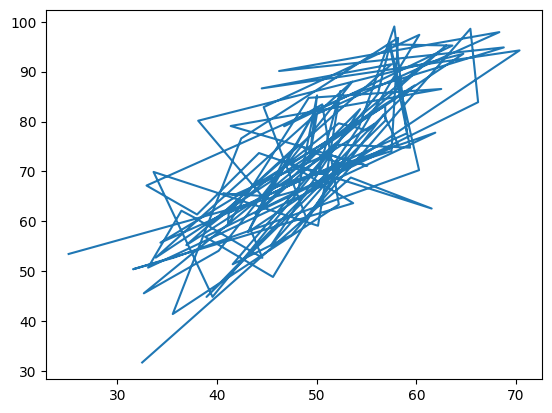

In [24]:
plt.plot(df['Hours'],df['Marks'])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Prepare data
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Step 2: Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# Step 3: Scale AFTER split
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 4: Use tuned SVR
sv = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
sv.fit(x_train, y_train)
sv_pred = sv.predict(x_test)
sv.pred=scaler.inverse_transform(sv_pred.reshape(-1,1))

# Step 5: Evaluate
print("MSE:", mean_squared_error(y_test, sv_pred))
print("R² Score:", r2_score(y_test, sv_pred))


MSE: 110.62244781375202
R² Score: 0.6523300460289726


In [ ]:
# SVR Hyperparameters Explanation:

# C (Regularization Parameter):
# - Controls the trade-off between model complexity and training error.
# - High C (e.g., 100): Less tolerance for error → model fits training data more tightly.
# - Low C (e.g., 1): More tolerance → simpler model, less overfitting.

# epsilon (ε-tube):
# - Defines a margin of tolerance around the predicted value.
# - Errors within ±ε are ignored (no penalty).
# - Small epsilon → tight fit, large epsilon → smoother predictions.

# gamma (Kernel Coefficient for 'rbf'):
# - Controls how far the influence of a single training example reaches.
# - High gamma (e.g., 1): Points have close-range influence → complex curve (risk of overfitting).
# - Low gamma (e.g., 0.01): Points have far-reaching influence → smoother curve (risk of underfitting).

# Example Usage:
# SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
